In [1]:
import nltk

In [2]:
#nltk.download('punkt')

In [3]:
#nltk.download('stopwords')

In [4]:
#nltk.download('averaged_perceptron_tagger')

In [5]:
#nltk.download()

In [6]:
from nltk import punkt

In [7]:
from nltk.corpus import stopwords

In [8]:
import matplotlib.pyplot as plt

description ici

def main ici


ouvrir le txt document et le transformer en string

In [9]:
def text_to_string(filename):
    with open(filename) as infile:
        return infile.read()

"""Return dictionary of tokenized words by corpus by book.egalement on a besoin de mettre tous les token en lower case

In [10]:
def make_word_dict(strings_from_book):
    
    words_from_book = dict()
    for book in strings_from_book:
        tokens = nltk.word_tokenize(strings_from_book[book])
        words_from_book[book] = ([token.lower() for token in tokens
                                    if token.isalpha()])
    return words_from_book

In [11]:
strings_from_book = dict()
strings_from_book['Frankenstein'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/frankenstein.txt')
strings_from_book['Last Man'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/LastMan.txt')
strings_from_book['Unwritten 1'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/GPT3/gpt3_unwritten1.txt')
strings_from_book['Unwritten 2'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/GPT3/gpt3_unwritten2.txt')

print(strings_from_book['Frankenstein'][:300]) 



Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my w


In [12]:
frankenstein = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/frankenstein.txt')

In [13]:
LINES = ['-', ':', '--', '-.']
words_from_book = make_word_dict(strings_from_book)

In [14]:
def find_shortest_corpus(words_by_author):
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('\nNumber of words for {} = {}\n'.
              format(author, len(words_by_author[author])))
    len_shortest_corpus = min(word_count)
    print('length shortest corpus = {}\n'.format(len_shortest_corpus))
    
    return len_shortest_corpus

In [15]:
def stopwords_test(words_from_book,len_shortest_corpus ):
    stopwords_by_book_freq_dist = dict()
    plt.figure(4)
    stop_words = set(stopwords.words('english'))  # Use set for speed.
    print('Number of stopwords = {}\n'.format(len(stop_words)))
    print('Stopwords = {}\n'.format(stop_words))
    for i, book in enumerate(words_from_book):
        stopwords_by_book = [word for word in words_from_book[book]
        [:len_shortest_corpus] if word in stop_words]
        stopwords_by_book_freq_dist[book] = nltk.FreqDist(stopwords_by_book)
        stopwords_by_book_freq_dist[book].plot(30,
                                                   label=words_from_book[book],
                                                   linestyle=LINES[i],
                                                   title=
                                                   '30 Most Common Stopwords')
    plt.legend()


plt.show()

In [16]:
len_shortest_corpus = find_shortest_corpus(words_from_book)


Number of words for Frankenstein = 74564


Number of words for Last Man = 173034


Number of words for Unwritten 1 = 541


Number of words for Unwritten 2 = 523

length shortest corpus = 523



Number of stopwords = 179

Stopwords = {'ourselves', 'hasn', 'this', 'a', 'such', 'shouldn', 'isn', 'myself', 'them', 'until', 'o', 'wouldn', 'and', 'were', 'being', 'weren', "shan't", 'between', 'll', 'mightn', 'they', 'their', 'why', "weren't", 'against', 'more', 'd', "aren't", 'if', 'we', 'can', 'too', 'who', 'from', 'in', "mightn't", 'herself', 'having', 'themselves', 'me', 'same', 'haven', 'you', 'on', 'with', "isn't", "you'd", 'didn', 'itself', 'did', "mustn't", 'to', 'below', 'our', 'wasn', 'only', 'your', 'it', 'through', 'again', 'she', 'my', 'does', 'for', 'should', "needn't", 'above', 'won', 'few', 'his', "wouldn't", "don't", 'other', 'as', 'when', 'some', 'yours', "doesn't", 'both', 'where', 'himself', 'are', 'him', 'yourselves', 'an', 'very', 'but', 'there', 'don', 'been', 'all', 'now', 'own', "didn't", "couldn't", 'is', 'what', 'after', 'the', 'of', "wasn't", 'have', 'because', "shouldn't", 'those', "she's", 'than', "that'll", 'm', 'doesn', 'about', 'i', 'ours', 'her', 'h

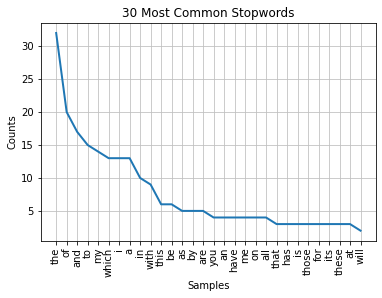

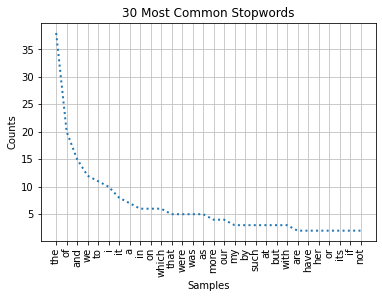

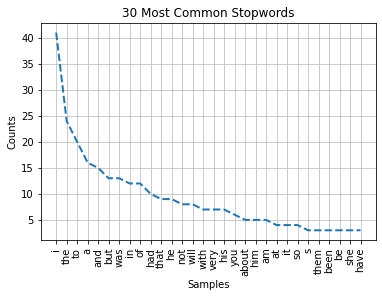

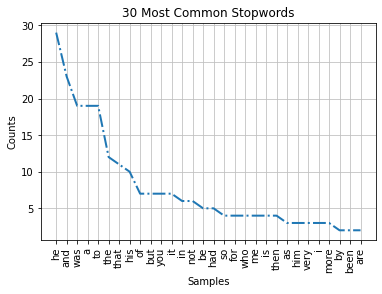

No handles with labels found to put in legend.


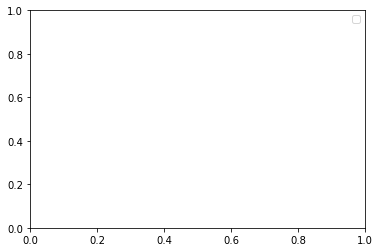

In [17]:
stopwords_test(words_from_book, len_shortest_corpus)

In [22]:
def word_length_test(words_by_author, len_shortest_corpus):
    by_author_length_freq_dist = dict()
    plt.figure(4)
    plt.ion()
    for i, author in enumerate(words_by_author):
        word_lengths = [len(word) for word in words_by_author[author]
        [:len_shortest_corpus]]
        by_author_length_freq_dist[author] = nltk.FreqDist(word_lengths)
        by_author_length_freq_dist[author].plot(10, linestyle=LINES[i],
                                                title='Word Length')


    plt.legend(author)
    plt.show()

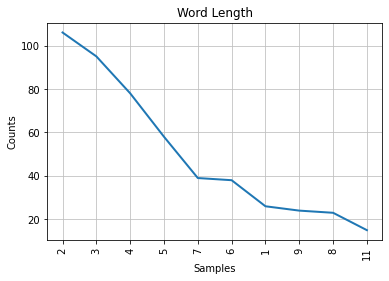

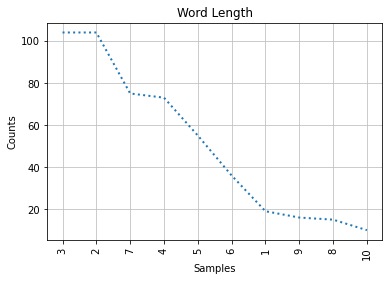

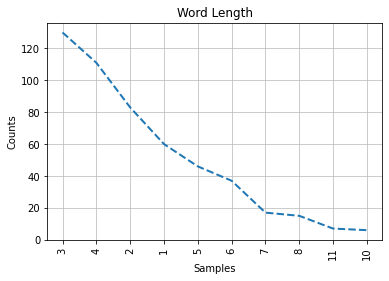

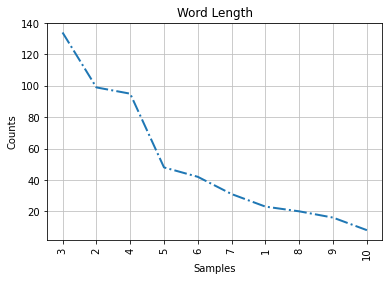

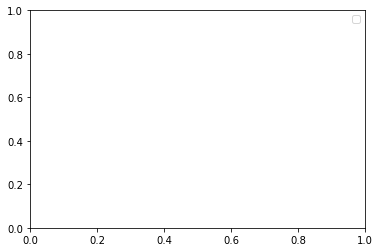

In [23]:
word_length_test(words_from_book, len_shortest_corpus)

In [34]:
def parts_of_speech_test(words_from_book, len_shortest_corpus):
    by_author_pos_freq_dist = dict()
    plt.figure(3)
    for i, author in enumerate(words_from_book):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_from_book[author]
                                                        [:len_shortest_corpus])]
        by_author_pos_freq_dist[author] = nltk.FreqDist(pos_by_author)
        by_author_pos_freq_dist[author].plot(35,
                                             label=author,
                                             linestyle=LINES[i],
                                             title='Part of Speech')
    plt.legend()
    plt.show()

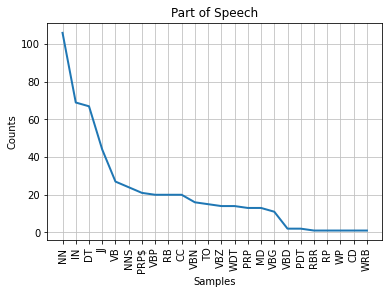

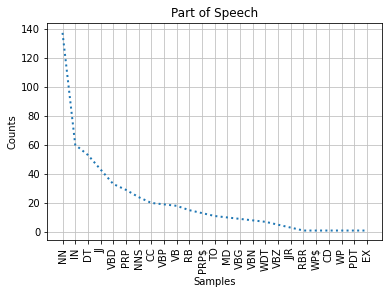

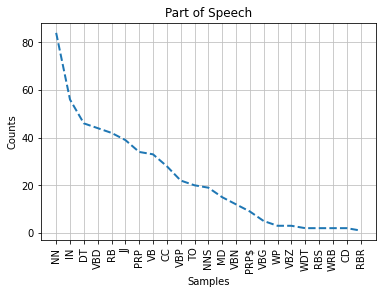

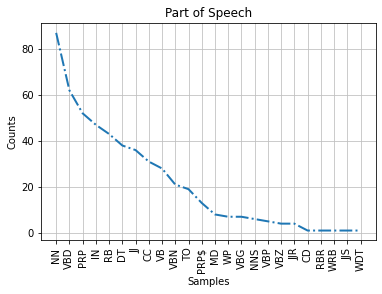

No handles with labels found to put in legend.


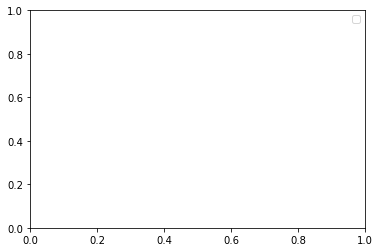

In [35]:
parts_of_speech_test(words_from_book, len_shortest_corpus)

In [40]:
def word_length_test(words_from_book, len_shortest_corpus):
    by_author_length_freq_dist = dict()
    plt.figure(1)
    plt.ion()
    for i, author in enumerate(words_from_book):
        word_lengths = [len(word) for word in words_from_book[author]
        [:len_shortest_corpus]]
        by_author_length_freq_dist[author] = nltk.FreqDist(word_lengths)
        by_author_length_freq_dist[author].plot(10, linestyle=LINES[i],
                                                title='Word Length')


    plt.legend(author)
    plt.show()

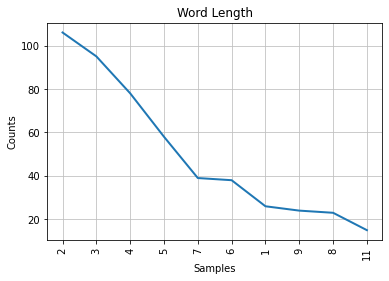

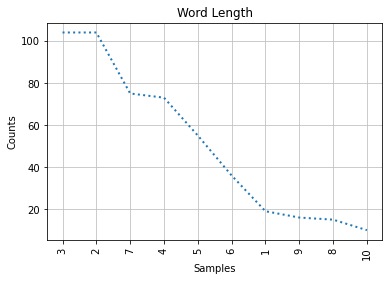

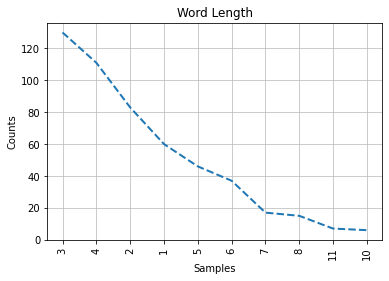

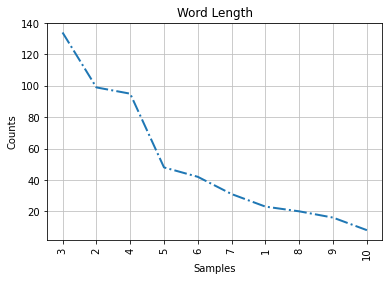

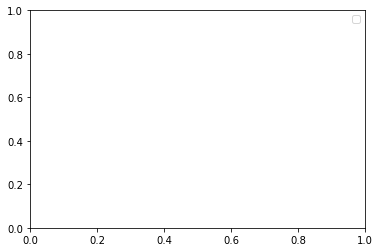

In [41]:
word_length_test(words_from_book, len_shortest_corpus)

In [43]:
def vocab_test(words_by_author):
    chisquared_by_author = dict()
    for author in words_from_book:
        if author != 'unknown':
            # Combine corpus for author & unknown & find 1000 most-common words.
            combined_corpus = (words_from_book[author] +
                               words_from_book['unknown'])
            author_proportion = (len(words_from_book[author]) /
                                 len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0

            # Calculate observed vs. expected word counts.
            for word, combined_count in most_common_words:
                observed_count_author = words_from_book[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author -
                                expected_count_author) ** 2 /
                               expected_count_author)
                chisquared_by_author[author] = chisquared
            print('Chi-squared for {} = {:.1f}'.format(author, chisquared))

    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

In [45]:
vocab_test(words_from_book)

KeyError: 'unknown'

In [ ]:
def jaccard_test(words_by_author, len_shortest_corpus):
    Calculate Jaccard similarity of each known corpus to unknown corpus.
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['unknown']
                               [:len_shortest_corpus])
    authors = (author for author in words_by_author if author != 'unknown')
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus])
        shared_words = unique_words_author.intersection(unique_words_unknown)
        jaccard_sim = (float(len(shared_words)) / (len(unique_words_author) +
                                                   len(unique_words_unknown) -
                                                   len(shared_words)))
        jaccard_by_author[author] = jaccard_sim
        print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))

    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))

In [ ]:
jaccard_test(words_by_author, len_shortest_corpus)